# Example of usage Spark OCR for Tables Detections

## Import Spark OCR transformers

## Install spark-ocr python packge
Need specify path to `spark-ocr-assembly-[version].jar`

In [1]:
license = ""

spark_ocr_jar_path = "../../spark-ocr/target/scala-2.12"
AWS_ACCESS_KEY_ID = ""#{YOUR_ACCESS_KEY}
AWS_SECRET_ACCESS_KEY = ""#{YOUR_SECRET_ACCESS_KEY}
imagePath = ""#{PATH_TO_YOUR_IMAGE}

In [2]:
%%bash
if python -c 'import google.colab' &> /dev/null; then
    echo "Run on Google Colab!"
    echo "Install Open JDK"
    apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
    java -version
fi

In [ ]:
import os
import sys
os.environ["AWS_ACCESS_KEY_ID"] = AWS_ACCESS_KEY_ID
os.environ["AWS_SECRET_ACCESS_KEY"] = AWS_SECRET_ACCESS_KEY
if license:
    os.environ['JSL_OCR_LICENSE'] = license
if 'google.colab' in sys.modules:
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

## Initialization of spark session
Need specify path to `spark-ocr-assembly.jar` or `secret`

In [4]:
from pyspark import SparkConf

sys.path.insert(1, os.path.join(os.getcwd()  , '../../spark-ocr/python'))

from sparkocr import start

spark = start(jar_path = spark_ocr_jar_path,
             extra_conf = SparkConf()
              .set("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:3.0.0-rc4,com.microsoft.onnxruntime:onnxruntime:1.7.0")
             )

spark

Spark version: 3.1.1
Spark NLP version: 3.0.3
Spark OCR version: 3.2.0



cTDaR_t10006.jpg

    Image #0:
    Origin: file:/home/alexander/avb/Workspace/spark-ocr-workshop/jupyter/data/tab_images/cTDaR_t10006.jpg
    Resolution: 0 dpi
    Width: 1191 px
    Height: 1684 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


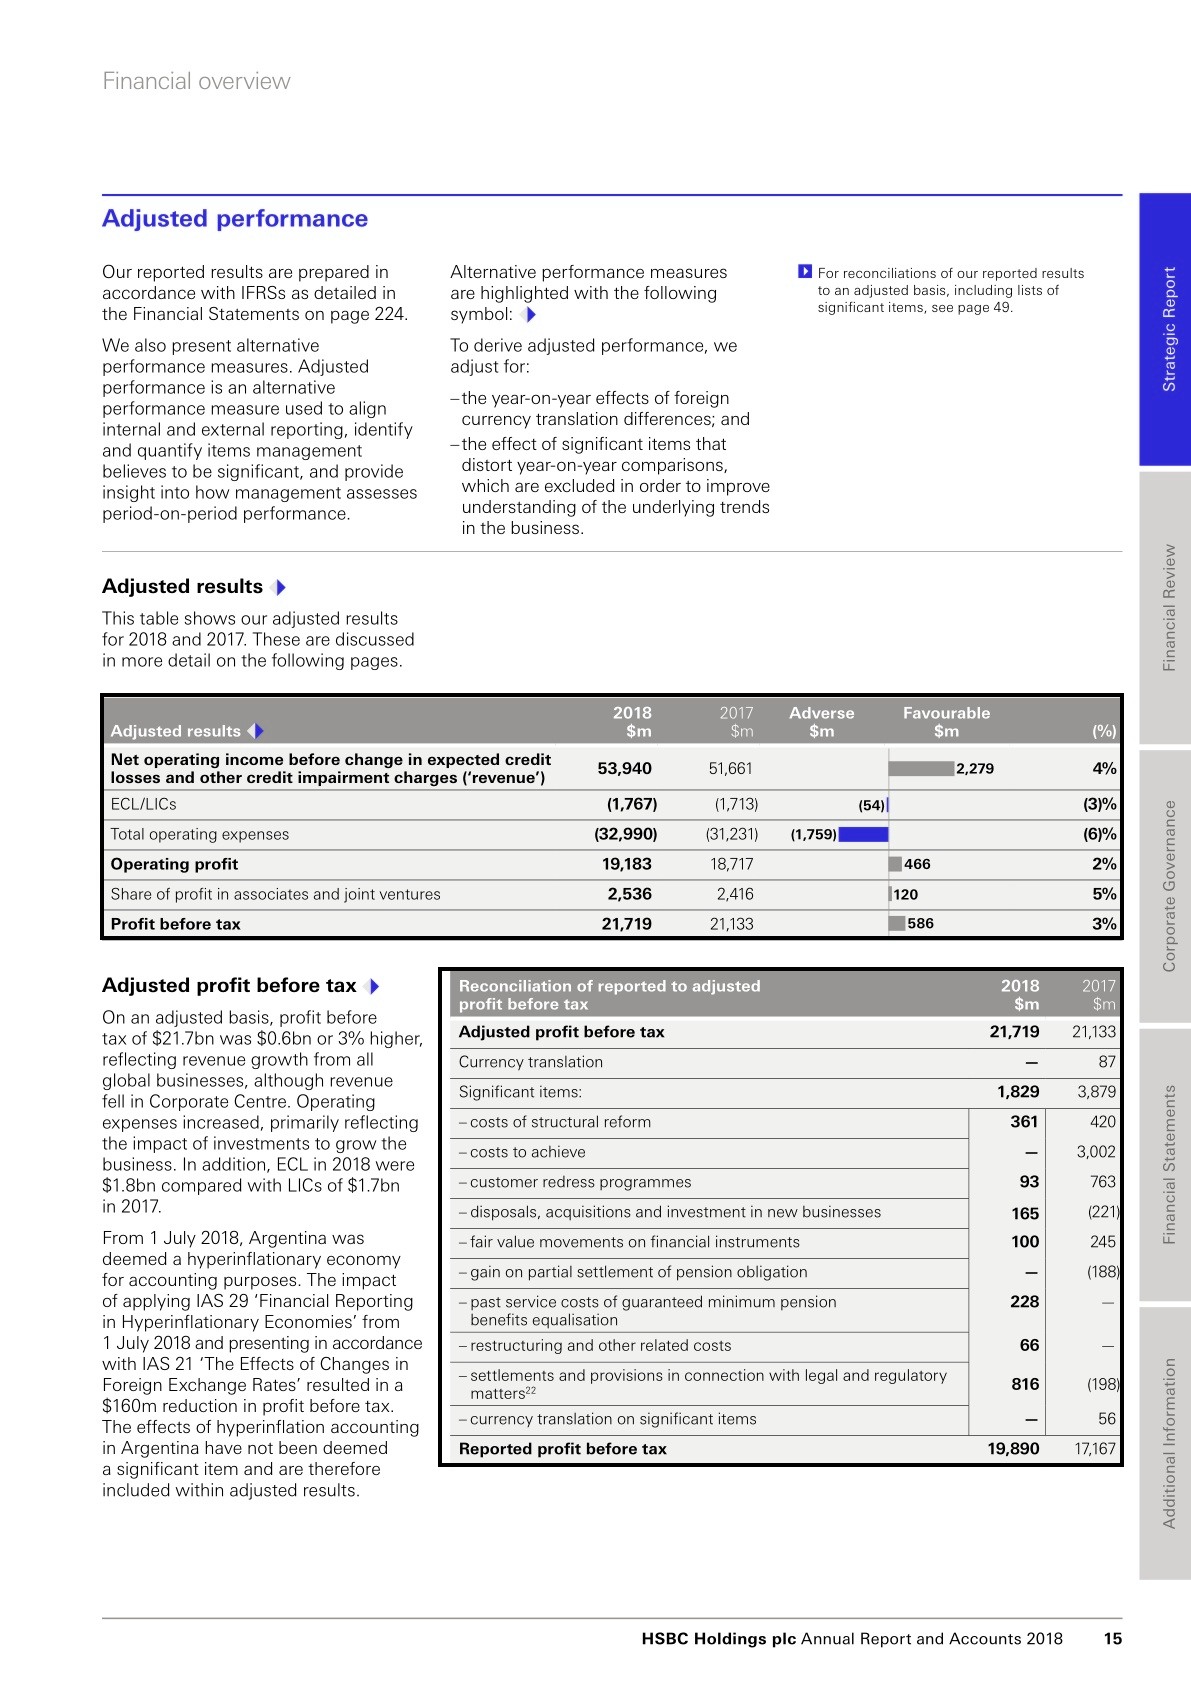

cTDaR_t10051.jpg

    Image #0:
    Origin: file:/home/alexander/avb/Workspace/spark-ocr-workshop/jupyter/data/tab_images/cTDaR_t10051.jpg
    Resolution: 0 dpi
    Width: 816 px
    Height: 1056 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


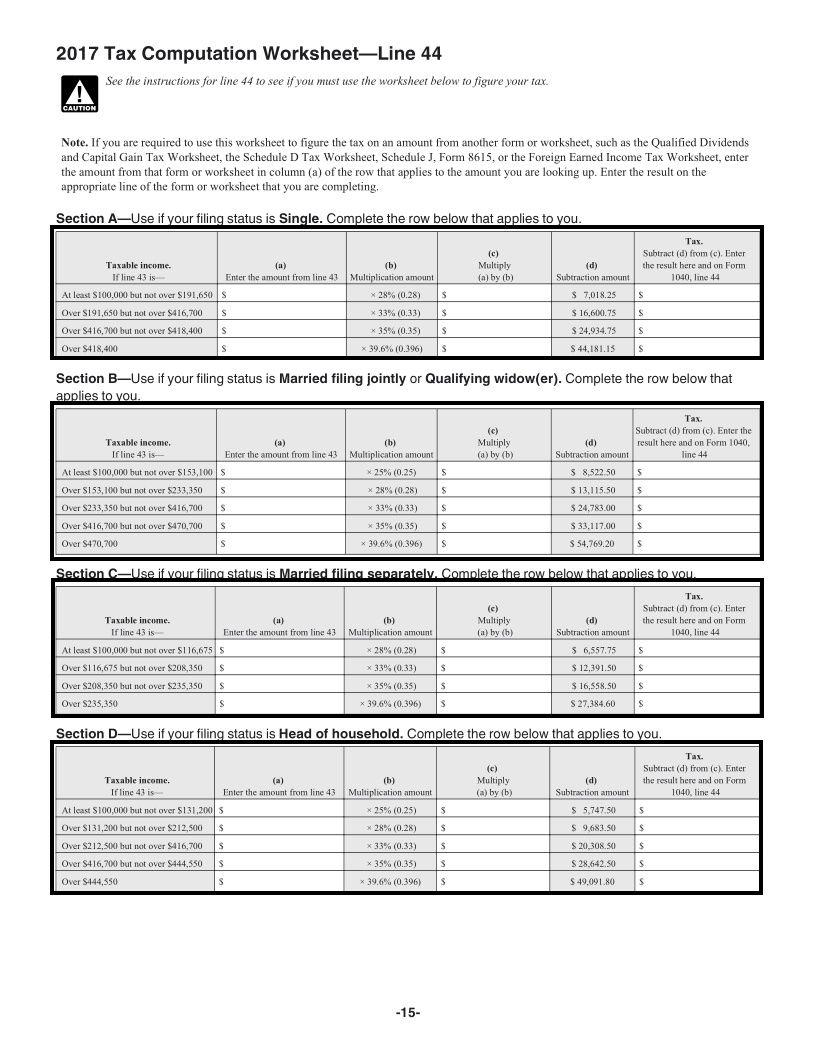

cTDaR_t10011.jpg

    Image #0:
    Origin: file:/home/alexander/avb/Workspace/spark-ocr-workshop/jupyter/data/tab_images/cTDaR_t10011.jpg
    Resolution: 0 dpi
    Width: 816 px
    Height: 1056 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


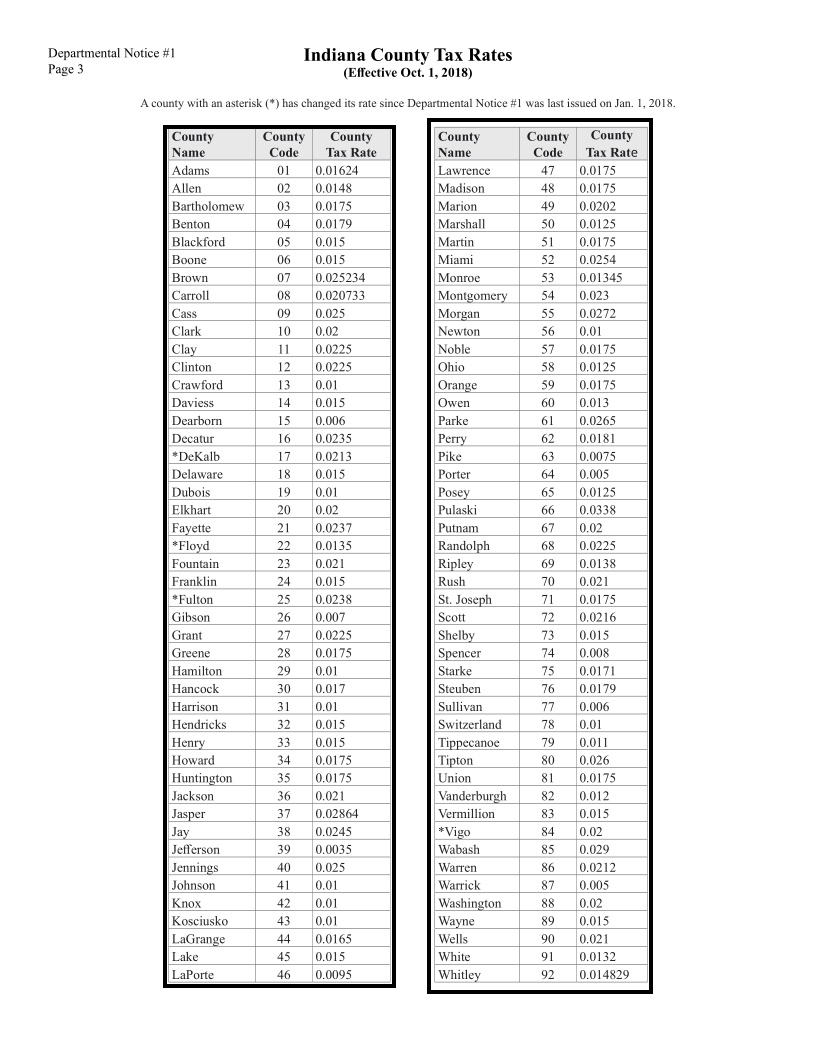

cTDaR_t10005.jpg

    Image #0:
    Origin: file:/home/alexander/avb/Workspace/spark-ocr-workshop/jupyter/data/tab_images/cTDaR_t10005.jpg
    Resolution: 0 dpi
    Width: 816 px
    Height: 1056 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


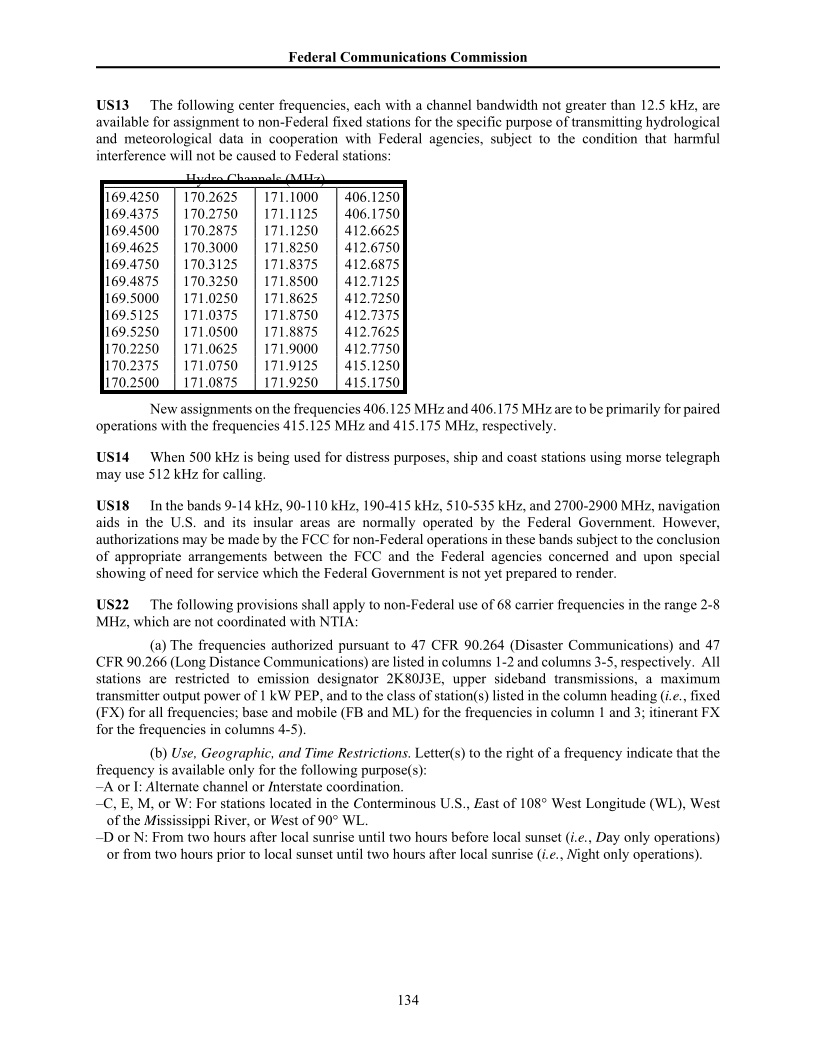

cTDaR_t10067.jpg

    Image #0:
    Origin: file:/home/alexander/avb/Workspace/spark-ocr-workshop/jupyter/data/tab_images/cTDaR_t10067.jpg
    Resolution: 0 dpi
    Width: 1190 px
    Height: 1588 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


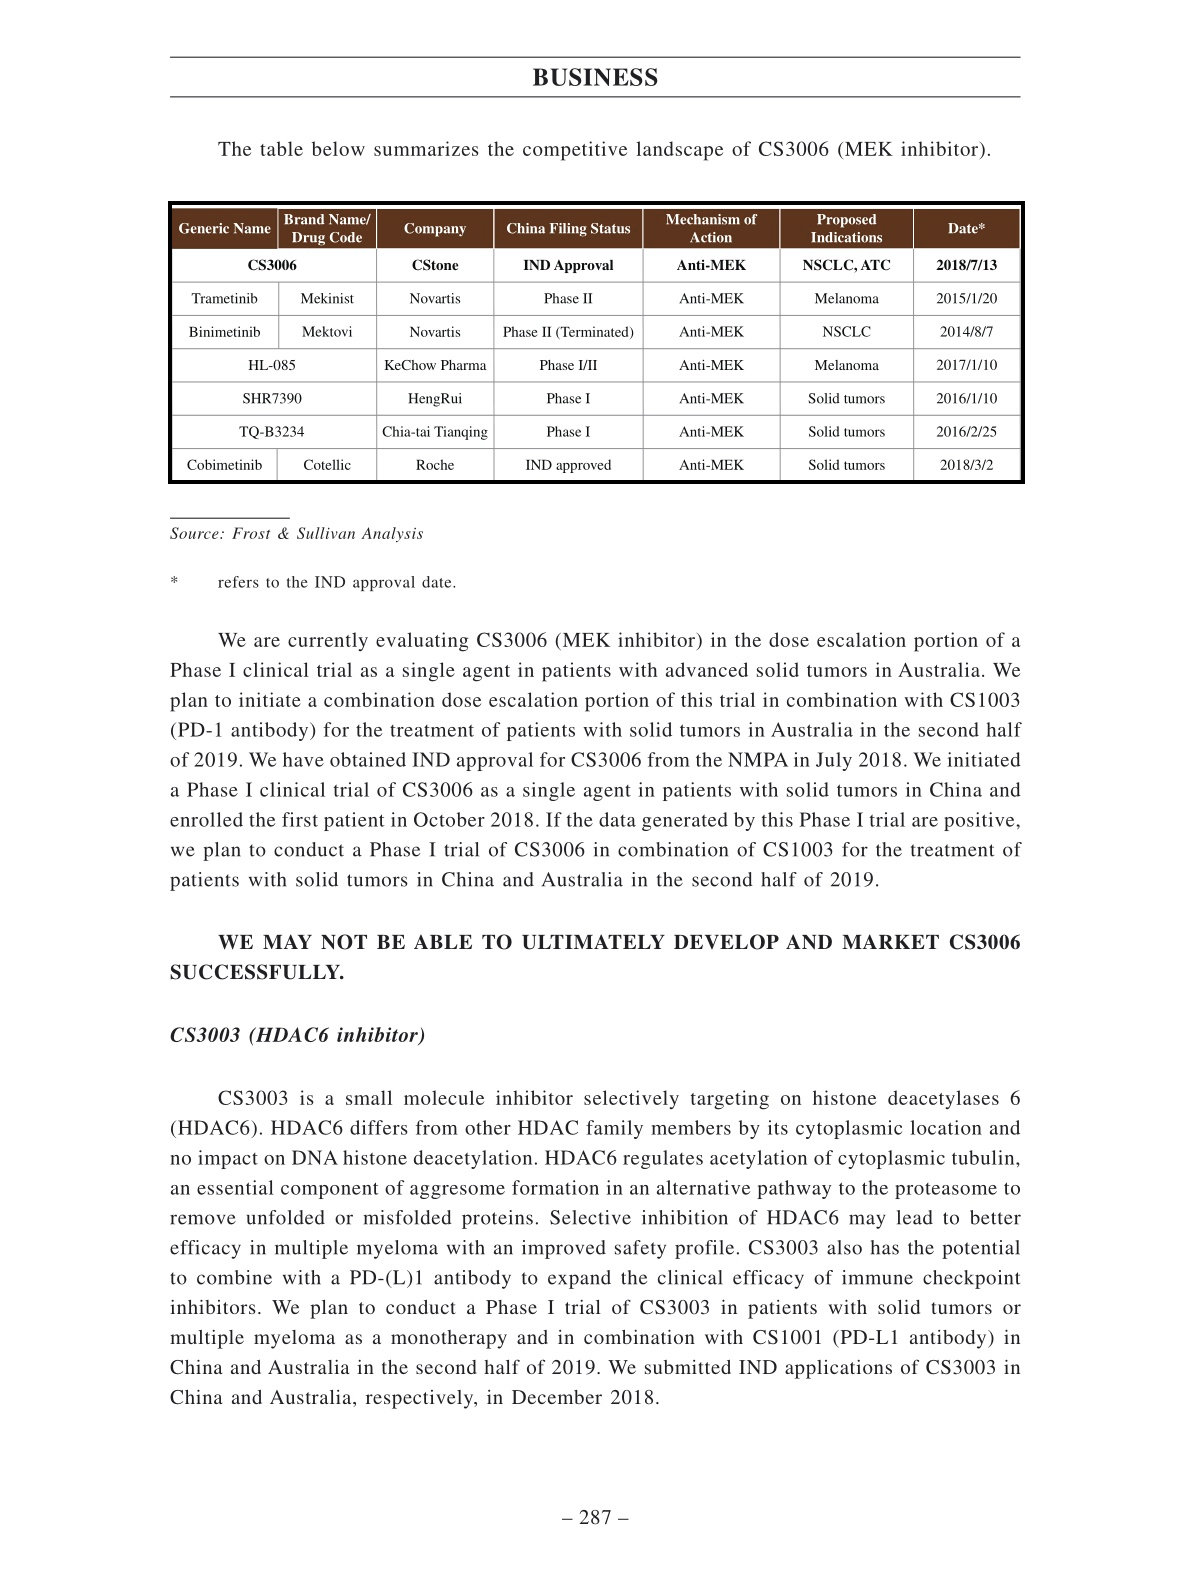

In [5]:
from sparkocr.transformers import *
from sparkocr.utils import display_image, display_images

def detect_tables(imgPath):
    image_raw = spark.read.format("binaryFile").load(imgPath)
    image_df = BinaryToImage(imageType = BinaryToImage.IMAGETYPE_TYPE_3BYTE_BGR).transform(image_raw)

    table_detector = ImageTableDetector()
    table_detector.setInputCol("image")
    table_detector.setOutputCol("table regions")
    image_df = table_detector.transform(image_df)

    draw_regions = ImageDrawRegions()
    draw_regions.setInputCol("image")
    draw_regions.setInputRegionsCol("table regions")
    draw_regions.setOutputCol("image with regions")
    image_df = draw_regions.transform(image_df)

    display_images(image_df, "image with regions")

from os import listdir
from os.path import isfile, join
imgDir = "./data/tab_images"
imges = [f for f in listdir(imgDir) if isfile(join(imgDir, f))]

for imgPath in imges:
    print(imgPath)
    detect_tables(os.path.join(imgDir, imgPath))